In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from scipy.stats import chi2_contingency

In [7]:
df = pd.read_csv('C:/Users/user/Desktop/공모전/수산시장/수산물.csv',encoding = 'cp949')

In [8]:
df.isnull().sum()  # null 값 없음

REG_DATE         0
P_TYPE           0
CTRY_1           0
CTRY_2           0
P_PURPOSE        0
CATEGORY_1       0
CATEGORY_2       0
P_NAME           0
P_IMPORT_TYPE    0
P_PRICE          0
dtype: int64

In [4]:
df[:]

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.48
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.92
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.36
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.26
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.79
...,...,...,...,...,...,...,...,...,...,...
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.44
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.28
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.4
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.85


In [12]:
len(df['P_NAME'].unique())

286

In [14]:
import platform

In [22]:
platform.system() 
plt.rc('font', family='Malgun Gothic')


In [23]:
category1 = pd.Series(df['CATEGORY_1'])

0             갑각류
1             갑각류
2             갑각류
3          패류 멍게류
4              어류
           ...   
42068         갑각류
42069    연체류 해물모듬
42070         갑각류
42071      패류 멍게류
42072          어류
Name: CATEGORY_1, Length: 42073, dtype: object

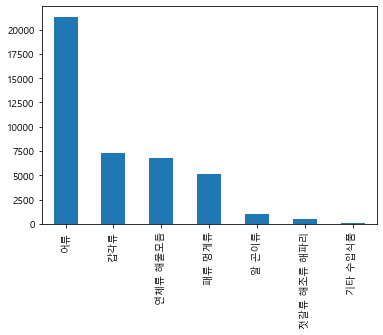

In [24]:
category1.value_counts().plot(kind = 'bar')
category1

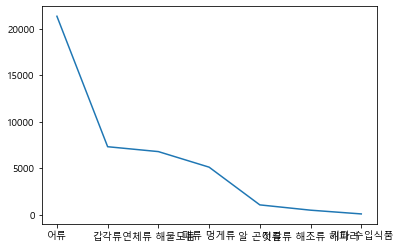

In [67]:
plt.plot(category1.value_counts())

In [19]:
category1.value_counts()

어류             21339
갑각류             7298
연체류 해물모듬        6772
패류 멍게류          5097
알 곤이류           1037
젓갈류 해조류 해파리      467
기타 수입식품           63
Name: CATEGORY_1, dtype: int64

In [25]:
category1_etc = df['CATEGORY_1'] == '기타 수입식품' ## 식용자라 

In [26]:
category1_salt= df['CATEGORY_1'] == '젓갈류 해조류 해파리'
category1_egg = df['CATEGORY_1'] == '알 곤이류'
category1_shellfish = df['CATEGORY_1'] == '패류 멍게류'
category1_sea = df['CATEGORY_1'] == '연체류 해물모듬'
category1_crustacea = df['CATEGORY_1'] == '갑각류'
category1_fish = df['CATEGORY_1']== '어류'

In [27]:
df1 = df[category1_salt]
df2 = df[category1_egg]
df3 = df[category1_shellfish]
df4 = df[category1_sea]
df5 = df[category1_crustacea]
df6 = df[category1_fish]

In [28]:
category1_saltdetail = Counter(df1['P_NAME']) # 젓갈류 해조류 해파리 에서 상세 종류
category1_eggdetail = Counter(df2['P_NAME'])
category1_shellfishdetail = Counter(df3['P_NAME'])
category1_seadetail = Counter(df4['P_NAME'])
category1_crustaceadetail = Counter(df5['P_NAME'])
category1_fishdetail = Counter(df6['P_NAME'])

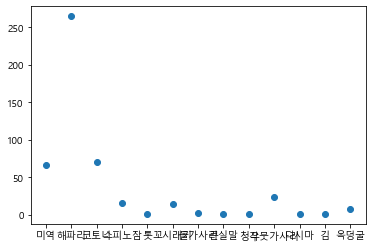

In [29]:
plt.scatter(category1_saltdetail.keys(),category1_saltdetail.values())

In [30]:
category1_saltdetail
category1_eggdetail
category1_shellfishdetail
category1_seadetail
category1_crustaceadetail
category1_fishdetail

Counter({'서대': 359,
         '은밀복': 117,
         '옥돔': 33,
         '까치복': 115,
         '대서양참다랑어': 270,
         '파타고니아이빨고기': 106,
         '눈다랑어': 926,
         '가오리': 803,
         '뱀장어': 407,
         '참다랑어': 979,
         '대서양연어': 290,
         '대구': 1298,
         '줄민태': 23,
         '홍서대': 108,
         '꽁치': 143,
         '황새치': 479,
         '틸라피아': 171,
         '기름치': 97,
         '까지가자미': 100,
         '홍어': 746,
         '먹장어': 520,
         '명태': 1640,
         '청상아리': 148,
         '붕어': 181,
         '감성돔': 155,
         '자주복': 167,
         '능성어': 75,
         '준치': 103,
         '참돔': 386,
         '연어': 1489,
         '장문볼락': 231,
         '각시가자미': 422,
         '가자미': 87,
         '민밀복': 107,
         '붕장어': 120,
         '갈치': 952,
         '밴댕이': 192,
         '동자개': 206,
         '병어': 67,
         '이스라엘잉어': 190,
         '영상가이석태': 457,
         '농어': 249,
         '아귀': 468,
         '긴가이석태': 408,
         '방어': 79,
         '고등어': 308,
         '흑밀복': 131,
   

In [31]:
category1_saltdetail

Counter({'미역': 66,
         '해파리': 265,
         '코토니': 70,
         '스피노잠': 15,
         '톳': 1,
         '꼬시래기': 14,
         '돌가사리': 2,
         '큰실말': 1,
         '청각': 1,
         '우뭇가사리': 23,
         '다시마': 1,
         '김': 1,
         '옥덩굴': 7})

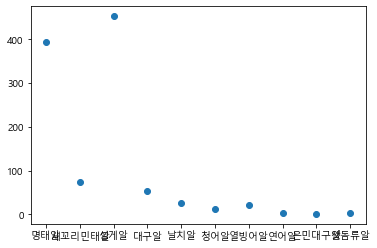

In [32]:
plt.scatter(category1_eggdetail.keys(),category1_eggdetail.values())

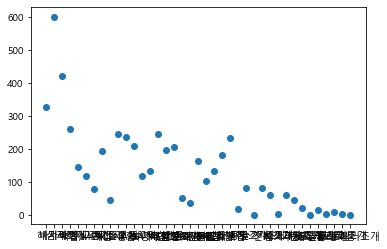

In [33]:
plt.scatter(category1_shellfishdetail.keys(),category1_shellfishdetail.values())

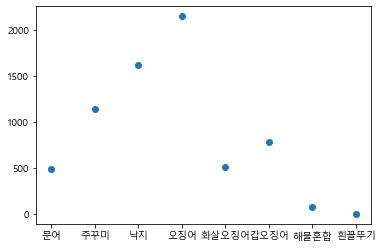

In [34]:
plt.scatter(category1_seadetail.keys(),category1_seadetail.values())

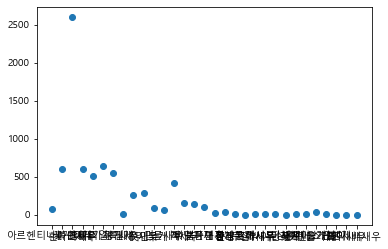

In [35]:
plt.scatter(category1_crustaceadetail.keys(),category1_crustaceadetail.values())

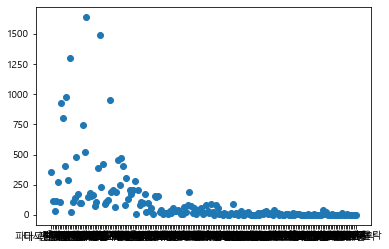

In [136]:
plt.scatter(category1_fishdetail.keys(),category1_fishdetail.values())

In [39]:
# 어느 용도로 쓰이는지
Counter(df['P_PURPOSE'])

Counter({'판매용': 39278,
         '외화획득용 원료': 911,
         '자사제품제조용': 1726,
         '합작': 144,
         '반송품(기타)': 14})

In [40]:
returning = df['P_PURPOSE'] == '반송품(기타)'

In [41]:
df[returning]

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
5830,2016-07-25,수산물,대한민국,스페인,반송품(기타),어류,참치 새치류,황다랑어,냉동,2.11
9049,2016-11-21,수산물,러시아,중국,반송품(기타),어류,명태,명태,냉동,1.51
9324,2016-11-28,수산물,대한민국,중국,반송품(기타),연체류 해물모듬,오징어,오징어,냉동,2.53
9719,2016-12-12,수산물,대한민국,중국,반송품(기타),연체류 해물모듬,오징어,오징어,냉동,2.38
15159,2017-06-19,수산물,러시아,중국,반송품(기타),어류,가자미,마설가자미,냉동,14.00
15906,2017-07-17,수산물,대한민국,일본,반송품(기타),패류 멍게류,조개 백합 대합,새조개,"냉동,살,자숙",29.09
16515,2017-08-07,수산물,태국,태국,반송품(기타),젓갈류 해조류 해파리,미역,미역,건조,9.15
18458,2017-10-16,수산물,대한민국,태국,반송품(기타),연체류 해물모듬,오징어,오징어,냉동,6.20
20553,2017-12-25,수산물,대한민국,중국,반송품(기타),연체류 해물모듬,오징어,오징어,냉동,2.92
23060,2018-03-19,수산물,대한민국,일본,반송품(기타),연체류 해물모듬,오징어,오징어,냉동,4.80


In [42]:
money = df['P_PURPOSE'] == '외화획득용 원료'

In [43]:
Counter(df[money]['CATEGORY_1'])

Counter({'어류': 623,
         '알 곤이류': 106,
         '젓갈류 해조류 해파리': 42,
         '갑각류': 91,
         '연체류 해물모듬': 28,
         '패류 멍게류': 21})

In [44]:
Counter(df[money]['CTRY_1'])  # 외화 획득용 원료 러시아 

Counter({'러시아': 599,
         '대만': 74,
         '남아프리카 공화국': 6,
         '대한민국': 7,
         '미국': 59,
         '아르헨티나': 15,
         '중국': 38,
         '일본': 18,
         '캐나다': 7,
         '노르웨이': 1,
         '나미비아': 3,
         '바누아투': 11,
         '칠레': 1,
         '니카라과': 1,
         '스페인': 1,
         '쿡 제도': 1,
         '세이셸': 5,
         '쿠바': 1,
         '파푸아뉴기니': 1,
         '멕시코': 41,
         '에콰도르': 9,
         '브라질': 2,
         '모로코': 3,
         '세네갈': 1,
         '우크라이나': 4,
         '키리바시': 1,
         '프랑스': 1})

In [45]:
Counter(df[money]['CTRY_2'])

Counter({'러시아': 596,
         '대만': 71,
         '세이셸': 6,
         '남아프리카 공화국': 12,
         '중국': 56,
         '미국': 53,
         '아르헨티나': 15,
         '일본': 16,
         '캐나다': 7,
         '네덜란드': 2,
         '덴마크': 1,
         '나미비아': 3,
         '바누아투': 6,
         '칠레': 1,
         '스페인': 3,
         '사모아': 1,
         '모리셔스': 5,
         '싱가포르': 1,
         '쿠바': 1,
         '투발루': 1,
         '세네갈': 3,
         '베네수엘라': 9,
         '멕시코': 31,
         '베트남': 2,
         '브라질': 2,
         '모로코': 1,
         '우크라이나': 4,
         '키리바시': 1,
         '프랑스': 1})

In [46]:
factory = df['P_PURPOSE'] == '자사제품제조용'
Counter(df[factory]['CATEGORY_1'])

Counter({'갑각류': 256,
         '젓갈류 해조류 해파리': 166,
         '어류': 788,
         '패류 멍게류': 228,
         '연체류 해물모듬': 271,
         '알 곤이류': 17})

In [47]:
Counter(df[factory]['CTRY_1'])

Counter({'베트남': 76,
         '인도네시아': 107,
         '러시아': 194,
         '노르웨이': 559,
         '캐나다': 9,
         '아일랜드': 52,
         '페루': 204,
         '칠레': 40,
         '터키': 14,
         '영국': 152,
         '미국': 61,
         '태국': 34,
         '이탈리아': 8,
         '모로코': 21,
         '리비아': 10,
         '사우디아라비아': 1,
         '대한민국': 12,
         '바누아투': 6,
         '중국': 65,
         '모리타니': 1,
         '스페인': 3,
         '파푸아뉴기니': 13,
         '필리핀': 6,
         '호주': 19,
         '일본': 11,
         '피지': 2,
         '대만': 7,
         '키리바시': 5,
         '튀니지': 10,
         '아이슬란드': 3,
         '뉴질랜드': 5,
         '말레이시아': 2,
         '멕시코': 1,
         '네덜란드': 3,
         '포르투갈': 1,
         '알제리': 7,
         '크로아티아': 1,
         '베네수엘라': 1})

In [48]:
Counter(df[factory]['CTRY_2'])

Counter({'베트남': 76,
         '인도네시아': 107,
         '러시아': 186,
         '노르웨이': 559,
         '캐나다': 9,
         '아일랜드': 52,
         '페루': 198,
         '칠레': 46,
         '일본': 67,
         '영국': 152,
         '미국': 60,
         '태국': 34,
         '사우디아라비아': 1,
         '중국': 82,
         '사모아': 5,
         '모리타니': 1,
         '파푸아뉴기니': 6,
         '모로코': 20,
         '필리핀': 6,
         '몰타': 3,
         '피지': 2,
         '호주': 18,
         '키리바시': 7,
         '아이슬란드': 3,
         '뉴질랜드': 5,
         '투발루': 3,
         '미크로네시아 연방': 2,
         '대만': 5,
         '터키': 4,
         '말레이시아': 2,
         '홍콩': 1,
         '스페인': 1,
         '멕시코': 1,
         '미얀마': 1,
         '베네수엘라': 1})

In [49]:
income = df['CTRY_1'] !=df['CTRY_2']

In [50]:
df[income]['P_PURPOSE'].unique()  #42073 중 4439  외국에 판매   , 합작은 그 나라에서만 사용  

array(['판매용', '자사제품제조용', '외화획득용 원료', '반송품(기타)'], dtype=object)

In [51]:
 Counter(df['P_IMPORT_TYPE'])

Counter({'냉동': 13568,
         '냉동,절단': 547,
         '건조,자숙': 284,
         '냉동,살,자숙': 1431,
         '냉동,살': 1044,
         '냉장,살': 64,
         '염장,살': 41,
         '냉동,한쪽껍질붙은': 56,
         '활': 8280,
         '냉장': 4682,
         '냉동,목살': 898,
         '냉동,목살,횟감': 194,
         '염장': 609,
         '냉동,알': 528,
         '냉동,필렛(F),횟감': 998,
         '냉동,포장횟감,필렛(F)': 189,
         '냉동,동체': 657,
         '냉동,창난': 75,
         '냉동,살,포장횟감': 329,
         '냉동,자숙,포장횟감': 93,
         '건조': 940,
         '냉동,다리,포장횟감': 76,
         '냉장,필렛(F)': 544,
         '냉동,자숙,한쪽껍질붙은': 80,
         '냉동,필렛(F)': 950,
         '냉동,살,자숙,포장횟감': 362,
         '냉장,횟감': 434,
         '냉동,다리': 440,
         '냉동,슬라이스(S),포장횟감': 213,
         '냉장,포장횟감,필렛(F)': 216,
         '냉동,동체,자숙': 366,
         '냉동,지느러미': 419,
         '냉장,필렛(F),횟감': 325,
         '냉동,곤이': 360,
         '냉동,머리': 194,
         '자숙,건조': 1,
         '냉동,슬라이스(S),자숙,포장횟감': 108,
         '냉동,슬라이스(S)': 23,
         '냉동,자숙': 407,
         '냉동,자숙,절단': 18

In [52]:
#df['REG_DATE'].unique()    # 2015-12월 28일 부터 2019 12월30일 까지

In [55]:
fish_market = df.drop(['P_TYPE'],axis =1)

In [56]:
from sklearn import preprocessing

In [58]:
def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [62]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 
for i in fish_market.columns :
  data_encoded[i]=label.fit_transform(fish_market[i])

In [63]:
data_encoded.head()

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,0,48,49,3,0,59,172,8,3511
1,0,30,29,3,0,10,48,8,1406
2,0,30,29,3,0,10,48,51,2289
3,0,66,66,3,6,105,265,4,1141
4,0,65,64,3,3,61,158,8,2863


In [67]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
data = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

In [68]:
data   # 0.43  CATEGORY_! 과 P_IMPORT_TYPE   (CATEGORY_1,CATEGORY_2,P_NAME 은 1)

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
REG_DATE,1.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.10
CTRY_1,0.01,1.00,0.69,0.09,0.17,0.11,0.20,0.06,0.13
CTRY_2,0.01,0.69,1.00,0.09,0.17,0.11,0.18,0.06,0.10
P_PURPOSE,0.01,0.09,0.09,1.00,0.01,0.13,0.22,0.09,0.11
CATEGORY_1,0.00,0.17,0.17,0.01,1.00,1.00,1.00,0.43,0.21
CATEGORY_2,0.00,0.11,0.11,0.13,1.00,1.00,1.00,0.18,0.12
P_NAME,0.01,0.20,0.18,0.22,1.00,1.00,1.00,0.25,0.12
P_IMPORT_TYPE,0.00,0.06,0.06,0.09,0.43,0.18,0.25,1.00,0.20
P_PRICE,0.10,0.13,0.10,0.11,0.21,0.12,0.12,0.20,1.00


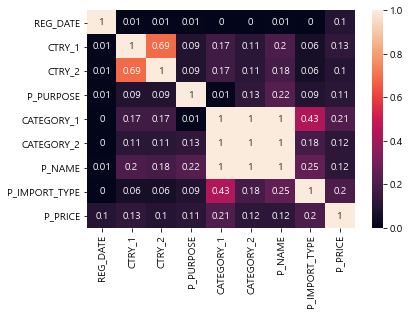

In [69]:
sns.heatmap(data,annot =True)

In [83]:
price_index1 = pd.read_excel('C:/Users/user/Desktop/공모전/수산시장/물가지수.xlsx')

In [84]:
price_index1

,통계표,7.6.3 수입물가지수(품목별)(2015=100),7.6.3 수입물가지수(품목별)(2015=100).1
0,항목명1,신선수산물,냉동수산물
1,항목명2,달러기준,달러기준
2,단위,2015=100,2015=100
3,가중치,1.8,6.8
4,변환,원자료,원자료
5,2015/12,103,93
6,2016/01,103,97
7,2016/02,105,96
8,2016/03,108,93
9,2016/04,117,96


In [85]:
price_index1 = price_index1.drop([0,1,2,3,4])

In [87]:
 price_index1.columns = ['날짜','신선','냉동']

In [88]:
price_index1

,날짜,신선,냉동
5,2015/12,103,93
6,2016/01,103,97
7,2016/02,105,96
8,2016/03,108,93
9,2016/04,117,96
10,2016/05,118,99
11,2016/06,117,101
12,2016/07,116,100
13,2016/08,130,99
14,2016/09,117,101


In [90]:
price_split =price_index1['날짜'].str.split('/')

In [91]:
price_split

5     [2015, 12]
6     [2016, 01]
7     [2016, 02]
8     [2016, 03]
9     [2016, 04]
10    [2016, 05]
11    [2016, 06]
12    [2016, 07]
13    [2016, 08]
14    [2016, 09]
15    [2016, 10]
16    [2016, 11]
17    [2016, 12]
18    [2017, 01]
19    [2017, 02]
20    [2017, 03]
21    [2017, 04]
22    [2017, 05]
23    [2017, 06]
24    [2017, 07]
25    [2017, 08]
26    [2017, 09]
27    [2017, 10]
28    [2017, 11]
29    [2017, 12]
30    [2018, 01]
31    [2018, 02]
32    [2018, 03]
33    [2018, 04]
34    [2018, 05]
35    [2018, 06]
36    [2018, 07]
37    [2018, 08]
38    [2018, 09]
39    [2018, 10]
40    [2018, 11]
41    [2018, 12]
42    [2019, 01]
43    [2019, 02]
44    [2019, 03]
45    [2019, 04]
46    [2019, 05]
47    [2019, 06]
48    [2019, 07]
49    [2019, 08]
50    [2019, 09]
51    [2019, 10]
52    [2019, 11]
53    [2019, 12]
Name: 날짜, dtype: object

In [7]:
price_split

5     [2015, 12]
6     [2016, 01]
7     [2016, 02]
8     [2016, 03]
9     [2016, 04]
10    [2016, 05]
11    [2016, 06]
12    [2016, 07]
13    [2016, 08]
14    [2016, 09]
15    [2016, 10]
16    [2016, 11]
17    [2016, 12]
18    [2017, 01]
19    [2017, 02]
20    [2017, 03]
21    [2017, 04]
22    [2017, 05]
23    [2017, 06]
24    [2017, 07]
25    [2017, 08]
26    [2017, 09]
27    [2017, 10]
28    [2017, 11]
29    [2017, 12]
30    [2018, 01]
31    [2018, 02]
32    [2018, 03]
33    [2018, 04]
34    [2018, 05]
35    [2018, 06]
36    [2018, 07]
37    [2018, 08]
38    [2018, 09]
39    [2018, 10]
40    [2018, 11]
41    [2018, 12]
42    [2019, 01]
43    [2019, 02]
44    [2019, 03]
45    [2019, 04]
46    [2019, 05]
47    [2019, 06]
48    [2019, 07]
49    [2019, 08]
50    [2019, 09]
51    [2019, 10]
52    [2019, 11]
53    [2019, 12]
Name: 날짜, dtype: object

In [92]:
price_split= list(price_split)
year = []
for i in price_split:
    year.append(i[0])
    
year
month = []
for i in price_split:
    month.append(i[1])
month

['12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12']

In [96]:
price_index1['year'] = year
price_index1['month'] = month

In [97]:
price_index1

,날짜,신선,냉동,year,month
5,2015/12,103,93,2015,12
6,2016/01,103,97,2016,01
7,2016/02,105,96,2016,02
8,2016/03,108,93,2016,03
9,2016/04,117,96,2016,04
10,2016/05,118,99,2016,05
11,2016/06,117,101,2016,06
12,2016/07,116,100,2016,07
13,2016/08,130,99,2016,08
14,2016/09,117,101,2016,09


In [98]:
reg_date_split = df['REG_DATE'].str.split('-')
reg_date_split = list(reg_date_split)

year1 = []
for i in reg_date_split:
    year1.append(i[0])
year1

month1 = []
for i in reg_date_split:
    month1.append(i[1])
month1

['12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',

In [99]:
df['year'] = year1
df['month'] = month1

In [100]:
df['날짜'] = df[['year','month']].apply(lambda x : '/'.join(x),axis = 1)

In [108]:
df['날짜']

0        2015/12
1        2015/12
2        2015/12
3        2015/12
4        2015/12
          ...   
42068    2019/12
42069    2019/12
42070    2019/12
42071    2019/12
42072    2019/12
Name: 날짜, Length: 42073, dtype: object

In [109]:
market = pd.merge(df,price_index1, on = '날짜')

In [110]:
market =market.drop(columns = ['P_TYPE','CATEGORY_1','year_x','year_y','month_x','month_y','CATEGORY_2'])

In [111]:
market

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE,날짜,신선,냉동
0,2015-12-28,아르헨티나,아르헨티나,판매용,아르헨티나붉은새우,냉동,7.48,2015/12,103,93
1,2015-12-28,바레인,바레인,판매용,꽃게,냉동,2.92,2015/12,103,93
2,2015-12-28,바레인,바레인,판매용,꽃게,"냉동,절단",3.36,2015/12,103,93
3,2015-12-28,칠레,칠레,판매용,해삼,"건조,자숙",18.26,2015/12,103,93
4,2015-12-28,중국,중국,판매용,서대,냉동,4.79,2015/12,103,93
...,...,...,...,...,...,...,...,...,...,...
42068,2019-12-30,러시아,러시아,판매용,왕게,활,38.44,2019/12,89,114
42069,2019-12-30,중국,중국,판매용,낙지,활,8.28,2019/12,89,114
42070,2019-12-30,러시아,러시아,판매용,대게,활,23.40,2019/12,89,114
42071,2019-12-30,중국,중국,판매용,바지락,활,0.85,2019/12,89,114


In [112]:
market['P_IMPORT_TYPE'].unique()

array(['냉동', '냉동,절단', '건조,자숙', '냉동,살,자숙', '냉동,살', '냉장,살', '염장,살',
       '냉동,한쪽껍질붙은', '활', '냉장', '냉동,목살', '냉동,목살,횟감', '염장', '냉동,알',
       '냉동,필렛(F),횟감', '냉동,포장횟감,필렛(F)', '냉동,동체', '냉동,창난', '냉동,살,포장횟감',
       '냉동,자숙,포장횟감', '건조', '냉동,다리,포장횟감', '냉장,필렛(F)', '냉동,자숙,한쪽껍질붙은',
       '냉동,필렛(F)', '냉동,살,자숙,포장횟감', '냉장,횟감', '냉동,다리', '냉동,슬라이스(S),포장횟감',
       '냉장,포장횟감,필렛(F)', '냉동,동체,자숙', '냉동,지느러미', '냉장,필렛(F),횟감', '냉동,곤이',
       '냉동,머리', '자숙,건조', '냉동,슬라이스(S),자숙,포장횟감', '냉동,슬라이스(S)', '냉동,자숙',
       '냉동,자숙,절단', '냉동,간', '건조,알,캐비아대용', '냉동,볼살', '냉동,볼살,횟감', '냉동,개아지살,살',
       '냉동,내장', '냉동,턱살', '냉동,집게다리', '냉동,외투막,살', '냉동,다리,자숙', '냉동,지느러미,자숙',
       '냉동,머리살,횟감', '건조,필렛(F)', '절단,건조', '냉동,개아지살,살,포장횟감', '건조,살,자숙',
       '냉동,턱살,횟감', '냉동,알,캐비아대용', '냉동,살,슬라이스(S),포장횟감', '냉동,머리살',
       '냉동,자숙,절단,횟감', '염장,알,캐비아대용', '건조,훈제', '냉동,동체,포장횟감', '냉동,횟감',
       '냉동,개아지살,살,횟감', '냉장,개아지살,살', '냉동,슬라이스(S),자숙', '냉동,난포선',
       '냉동,동체,자숙,포장횟감', '냉동,머리_외화획득용', '냉장,간', '줄기,염장', '건조,껍질',
       '냉동,다리,자숙,포장횟감', '냉동,꼬리_외화획득용'

In [113]:
market['P_PRICE'] = market['P_PRICE'].apply(lambda x : x.replace(',',''))

In [114]:
market['P_PRICE'].str.contains(',').unique()

array([False])

In [115]:
market_fre = market.loc[market['P_IMPORT_TYPE'].str.contains('냉동')]

In [116]:
market_fre

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE,날짜,신선,냉동
0,2015-12-28,아르헨티나,아르헨티나,판매용,아르헨티나붉은새우,냉동,7.48,2015/12,103,93
1,2015-12-28,바레인,바레인,판매용,꽃게,냉동,2.92,2015/12,103,93
2,2015-12-28,바레인,바레인,판매용,꽃게,"냉동,절단",3.36,2015/12,103,93
4,2015-12-28,중국,중국,판매용,서대,냉동,4.79,2015/12,103,93
5,2015-12-28,중국,중국,판매용,은밀복,냉동,2.17,2015/12,103,93
...,...,...,...,...,...,...,...,...,...,...
42062,2019-12-30,중국,중국,판매용,꽃게,"냉동,절단",3.02,2019/12,89,114
42063,2019-12-30,중국,중국,판매용,아귀,냉동,1.51,2019/12,89,114
42064,2019-12-30,대만,대만,판매용,꽁치,냉동,1.59,2019/12,89,114
42066,2019-12-30,노르웨이,노르웨이,판매용,고등어,냉동,2.19,2019/12,89,114


In [118]:
market_fre['냉동'] =market_fre['냉동'].apply(lambda x :int(x))

<ipython-input-118-3df69685783f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_fre['냉동'] =market_fre['냉동'].apply(lambda x :int(x))


In [119]:
market_fre['P_PRICE'] = market_fre['P_PRICE'].apply(lambda x : float(x))

<ipython-input-119-17e3ac75d8f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_fre['P_PRICE'] = market_fre['P_PRICE'].apply(lambda x : float(x))


In [120]:
market_fre['냉동']

0         93
1         93
2         93
4         93
5         93
        ... 
42062    114
42063    114
42064    114
42066    114
42067    114
Name: 냉동, Length: 25459, dtype: int64

In [121]:
market_fre['P_PRICE']

0        7.48
1        2.92
2        3.36
4        4.79
5        2.17
         ... 
42062    3.02
42063    1.51
42064    1.59
42066    2.19
42067    4.11
Name: P_PRICE, Length: 25459, dtype: float64

In [122]:
market_fre['org_price'] = market_fre['P_PRICE']/market_fre['냉동']*100

<ipython-input-122-ff2e715503ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_fre['org_price'] = market_fre['P_PRICE']/market_fre['냉동']*100


In [123]:
market_fre

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE,날짜,신선,냉동,org_price
0,2015-12-28,아르헨티나,아르헨티나,판매용,아르헨티나붉은새우,냉동,7.48,2015/12,103,93,8.043011
1,2015-12-28,바레인,바레인,판매용,꽃게,냉동,2.92,2015/12,103,93,3.139785
2,2015-12-28,바레인,바레인,판매용,꽃게,"냉동,절단",3.36,2015/12,103,93,3.612903
4,2015-12-28,중국,중국,판매용,서대,냉동,4.79,2015/12,103,93,5.150538
5,2015-12-28,중국,중국,판매용,은밀복,냉동,2.17,2015/12,103,93,2.333333
...,...,...,...,...,...,...,...,...,...,...,...
42062,2019-12-30,중국,중국,판매용,꽃게,"냉동,절단",3.02,2019/12,89,114,2.649123
42063,2019-12-30,중국,중국,판매용,아귀,냉동,1.51,2019/12,89,114,1.324561
42064,2019-12-30,대만,대만,판매용,꽁치,냉동,1.59,2019/12,89,114,1.394737
42066,2019-12-30,노르웨이,노르웨이,판매용,고등어,냉동,2.19,2019/12,89,114,1.921053


In [29]:
market_live = market.loc[market['P_IMPORT_TYPE'].str.contains('냉동')==False]

In [30]:
market_live['신선'].apply(lambda x : int(x))

3        103
10       103
11       103
15       103
16       103
        ... 
42068     89
42069     89
42070     89
42071     89
42072     89
Name: 신선, Length: 16614, dtype: int64

In [31]:
market_live['P_PRICE'] = market_live['P_PRICE'].apply(lambda x : float(x))
market_live['신선'] = market_live['신선'].apply(lambda x : int(x))

C:\Users\kio02\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kio02\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
market_live['org_price'] = market_live['P_PRICE']/market_live['신선']*100

C:\Users\kio02\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
fish_market = pd.concat([market_live,market_fre],axis = 0)

In [34]:
fish_market =fish_market.sort_values(by = ['날짜'],axis = 0)

In [35]:
market_salmon = fish_market['P_NAME'] == '연어'
market_shrimp= fish_market['P_NAME'] == '흰다리새우'
market_squid = fish_market['P_NAME'] == '오징어'
market_sal = fish_market[market_salmon]
market_shr = fish_market[market_shrimp]
market_squ = fish_market[market_squid]
last_market = pd.concat([market_sal,market_shr,market_squ],axis = 0)

In [36]:
last_market

,CTRY_1,CTRY_2,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE,날짜,신선,냉동,org_price
129,노르웨이,노르웨이,판매용,연어,"냉장,포장횟감,필렛(F)",19.15,2015/12,103,93,18.592233
168,노르웨이,노르웨이,판매용,연어,"냉장,필렛(F),횟감",12.08,2015/12,103,93,11.728155
198,노르웨이,노르웨이,판매용,연어,냉장,8.84,2015/12,103,93,8.582524
174,노르웨이,노르웨이,자사제품제조용,연어,"냉장,필렛(F)",13.43,2015/12,103,93,13.038835
74,노르웨이,노르웨이,판매용,연어,"냉장,필렛(F)",12.94,2015/12,103,93,12.563107
...,...,...,...,...,...,...,...,...,...,...
41150,칠레,칠레,판매용,오징어,"냉동,동체",2.26,2019/12,89,114,1.982456
41153,페루,페루,판매용,오징어,"냉동,동체,자숙",3.80,2019/12,89,114,3.333333
41093,미국,미국,판매용,오징어,냉동,2.78,2019/12,89,114,2.438596
41125,대만,대만,판매용,오징어,냉동,2.72,2019/12,89,114,2.385965


In [37]:
# 회귀분석(anova)

In [38]:
import statsmodels.api  as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [39]:
formula = 'org_price ~CTRY_1 +CTRY_2 + P_PURPOSE + P_NAME + P_IMPORT_TYPE +날짜'
lm = smf.ols(formula,last_market).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
CTRY_1,27.0,149594.129361,5540.523310,1147.414647,0.000000e+00
CTRY_2,28.0,871.155726,31.112704,6.443285,8.498105e-24
P_PURPOSE,3.0,1672.969705,557.656568,115.487884,9.513173e-73
P_NAME,2.0,3756.807083,1878.403542,389.007972,9.033389e-160
P_IMPORT_TYPE,22.0,67747.459222,3079.429965,637.734533,0.000000e+00
날짜,48.0,2989.724396,62.285925,12.899103,8.075960e-95
Residual,6125.0,29575.799266,4.828702,NaN,NaN


In [40]:
# 시게열

In [41]:
type(last_market['날짜'])

pandas.core.series.Series

In [42]:
last_market['날짜'] = pd.to_datetime(last_market['날짜'])

In [43]:
last_market.index = last_market['날짜']

In [56]:
last_ye = last_market['P_NAME'] == '연어'

In [59]:
last_ye = last_market[last_ye]

In [158]:
last_yes = last_ye['CTRY_1'] == last_ye['CTRY_2']

In [160]:
last_yes = last_ye[last_yes]

In [162]:
Counter(last_yes['CTRY_1']) 

Counter({'노르웨이': 1277,
         '캐나다': 51,
         '영국': 120,
         '칠레': 3,
         '미국': 4,
         '아일랜드': 2,
         '러시아': 11,
         '아이슬란드': 3,
         '베트남': 1,
         '뉴질랜드': 3,
         '호주': 12})

In [168]:
last_yes_c = last_yes['CTRY_1'] == '노르웨이'

In [171]:
Counter(last_yes[last_yes_c]['P_PURPOSE'])

Counter({'판매용': 835, '자사제품제조용': 442})

In [210]:
last_yes_c = last_yes[last_yes_c]

In [214]:
last_yes_c_s= last_yes_c['P_PURPOSE'] == '판매용'
last_yes_c_s = last_yes_c[last_yes_c_s]

In [217]:
Counter(last_yes_c_s['P_IMPORT_TYPE'])

Counter({'냉장,포장횟감,필렛(F)': 207,
         '냉장,필렛(F),횟감': 207,
         '냉장': 210,
         '냉장,필렛(F)': 210,
         '냉동': 1})

In [249]:
last_yes_c_s1 = last_yes_c_s[last_yes_c_s['P_IMPORT_TYPE'] == '냉장']
last_yes_c_s1

,CTRY_1,CTRY_2,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE,날짜,신선,냉동,org_price
날짜,,,,,,,,,,
2015-12-01,노르웨이,노르웨이,판매용,연어,냉장,8.84,2015-12-01,103,93,8.582524
2016-01-01,노르웨이,노르웨이,판매용,연어,냉장,10.02,2016-01-01,103,97,9.728155
2016-01-01,노르웨이,노르웨이,판매용,연어,냉장,8.89,2016-01-01,103,97,8.631068
2016-01-01,노르웨이,노르웨이,판매용,연어,냉장,9.52,2016-01-01,103,97,9.242718
2016-01-01,노르웨이,노르웨이,판매용,연어,냉장,9.37,2016-01-01,103,97,9.097087
...,...,...,...,...,...,...,...,...,...,...
2019-12-01,노르웨이,노르웨이,판매용,연어,냉장,11.06,2019-12-01,89,114,12.426966
2019-12-01,노르웨이,노르웨이,판매용,연어,냉장,13.21,2019-12-01,89,114,14.842697
2019-12-01,노르웨이,노르웨이,판매용,연어,냉장,12.33,2019-12-01,89,114,13.853933


In [250]:
last_yes_c_s1_p = last_yes_c_s1[['org_price']]

<AxesSubplot:xlabel='날짜'>

C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


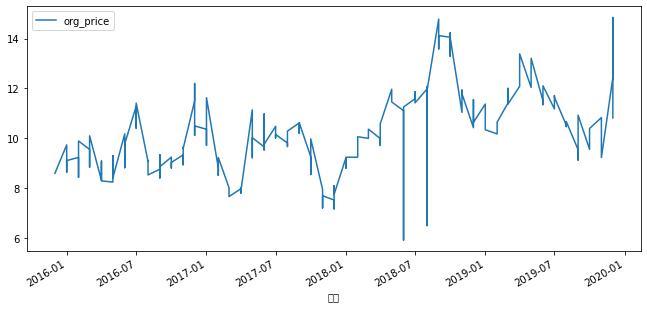

In [251]:
last_yes_c_s1_p.plot(figsize = (11,5))

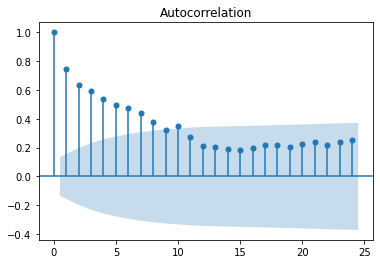

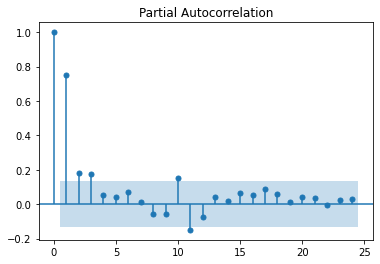

In [252]:
plot_acf(last_yes_c_s1_p)
plot_pacf(last_yes_c_s1_p)
plt.show()

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [253]:
model = ARIMA(last_yes_c_s1_p.org_price.values,order = (0,1,1))

C:\Users\kio02\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [254]:
model_fit = model.fit(trend = 'nc' , full_output = True ,disp = 1)

In [255]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  209
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -310.344
Method:                       css-mle   S.D. of innovations              1.067
Date:                Thu, 19 Aug 2021   AIC                            624.688
Time:                        15:39:12   BIC                            631.373
Sample:                             1   HQIC                           627.391
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y     -0.4913      0.074     -6.609      0.000      -0.637      -0.346
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.0354           +0.0000j            2.0354            0.0000
-----------------------------------------------------------------------------
"""

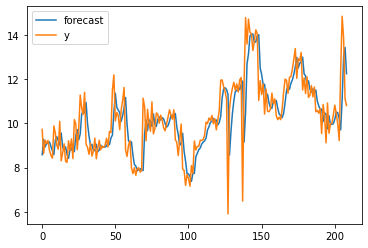

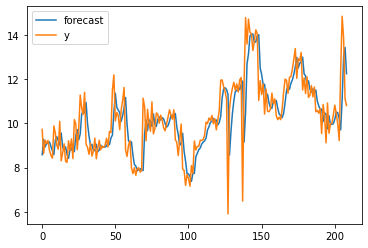

In [256]:
model_fit.plot_predict()

In [75]:
last_s = last_market['P_NAME'] == '흰다리새우'

In [83]:
last_s=last_market[last_s]

In [152]:
last_ss = last_s['CTRY_1'] == last_s['CTRY_2'] 

In [155]:
last_ss = last_s[last_ss]

In [156]:
Counter(last_ss['CTRY_1'])

Counter({'베트남': 1013,
         '말레이시아': 191,
         '에콰도르': 198,
         '태국': 741,
         '페루': 49,
         '중국': 161,
         '사우디아라비아': 66,
         '인도': 103,
         '인도네시아': 59,
         '파나마': 7,
         '필리핀': 4,
         '콜롬비아': 4})

In [175]:
last_ss_c = last_ss[last_ss['CTRY_1'] == '베트남']

In [179]:
Counter(last_ss_c['P_PURPOSE'])

Counter({'판매용': 1003, '자사제품제조용': 10})

In [220]:
last_ss_c_s = last_ss_c[last_ss_c['P_PURPOSE']  == '판매용']

In [223]:
Counter(last_ss_c_s['P_IMPORT_TYPE'])

Counter({'냉동,살,포장횟감': 189,
         '냉동,살,자숙,포장횟감': 186,
         '냉동,살': 209,
         '냉동,살,자숙': 209,
         '냉동': 169,
         '냉동,자숙': 41})

In [257]:
last_ss_c_s1 = last_ss_c_s[last_ss_c_s['P_IMPORT_TYPE'] == '냉동']
last_ss_c_s1

,CTRY_1,CTRY_2,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE,날짜,신선,냉동,org_price
날짜,,,,,,,,,,
2015-12-01,베트남,베트남,판매용,흰다리새우,냉동,6.48,2015-12-01,103,93,6.967742
2016-01-01,베트남,베트남,판매용,흰다리새우,냉동,6.58,2016-01-01,103,97,6.783505
2016-01-01,베트남,베트남,판매용,흰다리새우,냉동,7.08,2016-01-01,103,97,7.298969
2016-01-01,베트남,베트남,판매용,흰다리새우,냉동,7.16,2016-01-01,103,97,7.381443
2016-01-01,베트남,베트남,판매용,흰다리새우,냉동,7.45,2016-01-01,103,97,7.680412
...,...,...,...,...,...,...,...,...,...,...
2019-12-01,베트남,베트남,판매용,흰다리새우,냉동,8.03,2019-12-01,89,114,7.043860
2019-12-01,베트남,베트남,판매용,흰다리새우,냉동,7.29,2019-12-01,89,114,6.394737
2019-12-01,베트남,베트남,판매용,흰다리새우,냉동,8.97,2019-12-01,89,114,7.868421


In [258]:
last_ss_c_s1_p= last_ss_c_s1[['org_price']]

<AxesSubplot:xlabel='날짜'>

C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


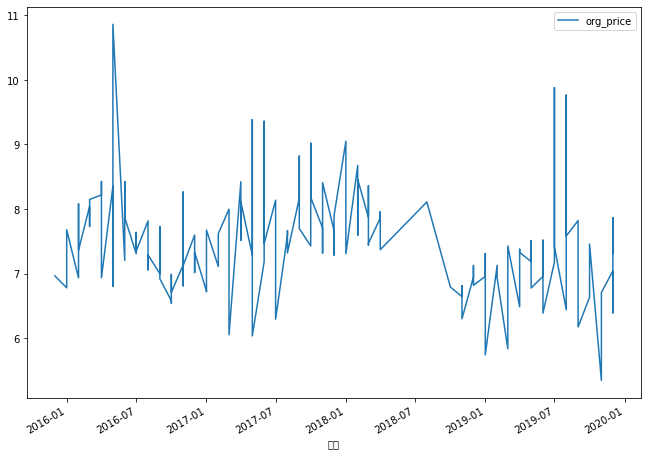

In [259]:
last_ss_c_s1_p.plot(figsize = (11,8))

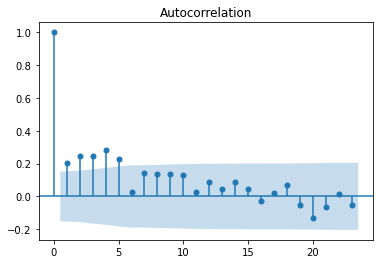

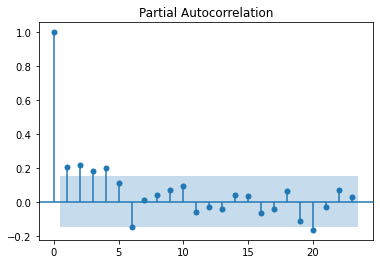

In [260]:
plot_acf(last_ss_c_s1_p)
plot_pacf(last_ss_c_s1_p)
plt.show()

In [261]:
model = ARIMA(last_ss_c_s1_p.org_price.values,order = (0,1,1))

C:\Users\kio02\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [262]:
model_fit = model.fit(trend = 'nc',full_output=  True,disp = 1)

In [263]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  168
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -182.378
Method:                       css-mle   S.D. of innovations              0.714
Date:                Thu, 19 Aug 2021   AIC                            368.756
Time:                        15:40:03   BIC                            375.004
Sample:                             1   HQIC                           371.292
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y     -0.8233      0.048    -17.248      0.000      -0.917      -0.730
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2146           +0.0000j            1.2146            0.0000
-----------------------------------------------------------------------------
"""

In [118]:
last_o = last_market['P_NAME'] == '오징어'

In [119]:
last_o

날짜
2015-12-01    False
2015-12-01    False
2015-12-01    False
2015-12-01    False
2015-12-01    False
              ...  
2019-12-01     True
2019-12-01     True
2019-12-01     True
2019-12-01     True
2019-12-01     True
Name: P_NAME, Length: 6240, dtype: bool

In [120]:
last_o =last_market[last_o]

In [147]:
last_os = last_o['CTRY_1'] == last_o['CTRY_2']

In [149]:
last_os = last_o[last_os]

In [180]:
last_os

,CTRY_1,CTRY_2,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE,날짜,신선,냉동,org_price
날짜,,,,,,,,,,
2015-12-01,페루,페루,판매용,오징어,"냉동,다리",1.23,2015-12-01,103,93,1.322581
2015-12-01,중국,중국,판매용,오징어,"냉동,동체",0.79,2015-12-01,103,93,0.849462
2015-12-01,칠레,칠레,판매용,오징어,"냉동,동체",0.96,2015-12-01,103,93,1.032258
2015-12-01,칠레,칠레,판매용,오징어,"냉동,지느러미",0.76,2015-12-01,103,93,0.817204
2015-12-01,페루,페루,판매용,오징어,"냉동,동체,자숙",5.48,2015-12-01,103,93,5.892473
...,...,...,...,...,...,...,...,...,...,...
2019-12-01,칠레,칠레,판매용,오징어,"냉동,동체",2.26,2019-12-01,89,114,1.982456
2019-12-01,페루,페루,판매용,오징어,"냉동,동체,자숙",3.80,2019-12-01,89,114,3.333333
2019-12-01,미국,미국,판매용,오징어,냉동,2.78,2019-12-01,89,114,2.438596


In [151]:
Counter(last_os['CTRY_1'])

Counter({'페루': 796,
         '중국': 539,
         '칠레': 536,
         '대만': 60,
         '아르헨티나': 44,
         '러시아': 8,
         '뉴질랜드': 39,
         '바누아투': 1,
         '에콰도르': 4,
         '미국': 5,
         '베트남': 2,
         '인도네시아': 2,
         '우루과이': 2})

In [187]:
last_os_cp = last_os[last_os['CTRY_1']=='페루']

In [188]:
Counter(last_os_cp['P_PURPOSE'])

Counter({'판매용': 598, '자사제품제조용': 198})

In [225]:
last_os_cp_s = last_os_cp[last_os_cp['P_PURPOSE'] == '판매용']

In [227]:
Counter(last_os_cp_s['P_IMPORT_TYPE'])

Counter({'냉동,다리': 154,
         '냉동,동체,자숙': 173,
         '냉동,지느러미': 149,
         '냉동,지느러미,자숙': 35,
         '냉동,다리,자숙': 4,
         '냉동': 11,
         '냉동,동체': 72})

In [190]:
last_os_cc = last_os[last_os['CTRY_1']== '중국']

In [191]:
Counter(last_os_cc['P_PURPOSE'])

Counter({'판매용': 484, '외화획득용 원료': 9, '자사제품제조용': 46})

In [229]:
last_os_cc_s = last_os_cc[last_os_cc['P_PURPOSE'] == '판매용']

In [231]:
Counter(last_os_cc_s['P_IMPORT_TYPE'])

Counter({'냉동,동체': 157,
         '냉동,슬라이스(S)': 22,
         '냉동,동체,자숙': 43,
         '냉동,슬라이스(S),포장횟감': 5,
         '냉동': 150,
         '냉동,다리': 71,
         '냉동,지느러미': 30,
         '냉동,자숙': 3,
         '건조': 3})

In [192]:
last_os_ch = last_os[last_os['CTRY_1'] == '칠레']

In [193]:
Counter(last_os_ch['P_PURPOSE'])

Counter({'판매용': 517, '자사제품제조용': 18, '외화획득용 원료': 1})

In [233]:
last_os_ch_s = last_os_ch[last_os_ch['P_PURPOSE'] == '판매용']

In [235]:
Counter(last_os_ch_s['P_IMPORT_TYPE'])

Counter({'냉동,동체': 171,
         '냉동,지느러미': 171,
         '냉동,다리': 154,
         '냉동,다리,자숙': 1,
         '냉동,동체,자숙': 7,
         '냉동,난포선': 3,
         '냉동': 10})

In [122]:
last_o1 = last_o[['org_price']]

In [123]:
last_o1

,org_price
날짜,
2015-12-01,1.322581
2015-12-01,0.849462
2015-12-01,1.032258
2015-12-01,0.817204
2015-12-01,5.892473
...,...
2019-12-01,1.982456
2019-12-01,3.333333
2019-12-01,2.438596


<AxesSubplot:xlabel='날짜'>

C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kio02\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


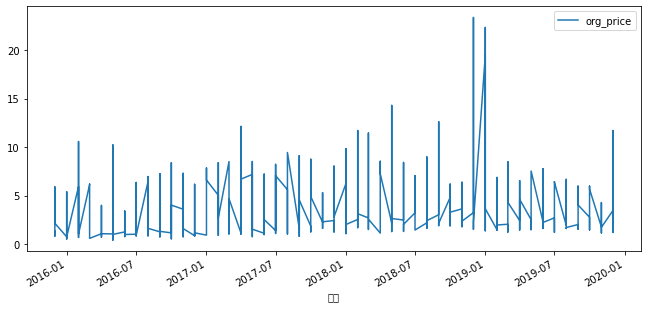

In [124]:
last_o1.plot(figsize = (11,5))

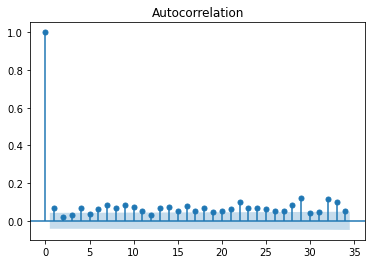

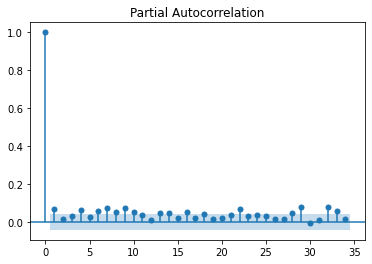

In [126]:
plot_acf(last_o1)
plot_pacf(last_o1)
plt.show()